### **Introdução**

Neste projeto, exploramos um cenário fictício em que uma empresa da área de Big Data e Data Science busca novos talentos para integrar sua equipe. Para isso, oferece treinamentos avançados a profissionais interessados em atuar na área.

Com um número crescente de inscritos, surge a necessidade de entender melhor o perfil dos participantes: quem realmente deseja trabalhar na empresa após o treinamento e quem busca apenas aprimorar suas habilidades para outras oportunidades. A partir das informações fornecidas na inscrição — como dados demográficos, formação e experiência — a proposta é realizar uma análise que ajude o time de Recursos Humanos a tomar decisões mais estratégicas, otimizando o processo seletivo e a estruturação dos cursos.



### INCLUIR PARÁGRAFO SOBRE O QUE ABORDAREI NO PROJETO

### Importação e tratamento de dados
Os dados utilizados neste projeto foram obtidos por meio da comunidade Kaggle e estão disponíveis publicamente desde 2020, podendo ser acessados [neste link](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists/data).


In [383]:
# Importando as bibliotecas necessárias ao projeto
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

In [384]:
# Importação dos dados
df_Submission = pd.read_csv('Material/sample_submission.csv', sep=',')
df_Submission.head()

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5


In [385]:
df_Submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   enrollee_id  2129 non-null   int64  
 1   target       2129 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 33.4 KB


In [386]:
df_Train = pd.read_csv('Material/aug_train.csv', sep=',')
df_Train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [387]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### Dicionário das variáveis

- **enrollee_id** - Identificador único do candidato
- **city** - Código da cidade
- **city_development_index** - Índice de desenvolvimento da cidade
- **gender** - Gênero
- **relevent_experience** - Experiência relevante do candidato
- **education_level** - Nível educacional
- **enrolled_university** - Tipo de curso matriculado
- **major_discipline** - Área de estudo do candidato
- **experience** - Experiência prévia em anos
- **company_size** - Quantidade de funcionários do emprego atual
- **company_type** - Tipo de empresa que trabalha atualmente
- **last_new_job** - Diferença em anos entre o emprego atual e último
- **trainig_hours** - Horas de treinamento concluídas
- **target** - Variável alvo, onde 0 representa "Não busca mudança de emprego" e 1 "Busca mudança de emprego".

### Após o entendimento das variáveis, vamos as métricas das base de dados

In [388]:
df_Train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


*O City Development Index (CDI) é uma métrica que representa o nível de desenvolvimento urbano com base em diferentes indicadores. Seus valores variam de 0 a 1, onde 0 representa o desenvolvimento mínimo ou nenhum desenvolvimento, e 1 representa o desenvolvimento máximo.*

Além disso, vamos avaliar algumas das variáveis numéricas:

Avaliando o **city_development_index** temos:
- Média de 0,83
- Desvio padrão de 0,123
- Mediana de 0,903

O que nos remete a que a maioria dos candidativos vêm de cidades bem desenvolvidas

Em **training_hours** nós temos:
- Média de 65,36
- Mediana de 47,00
- Valor máximo de 336

Temos mais candidatos com poucas horas de treinamento do que muitas, mas, além disso, é interessante notar que alguns deles gastam muito tempo em treinamento.

In [389]:
df_Train.describe(include=object).T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


In [390]:
# Com o describe das colunas object, é possível notar que há vários dados faltantes. Vamos analisá-los:

for col in df_Train.columns:
    print(f'Coluna: {col}')
    print(df_Train[col].unique())
    print(f'- ' * 10)

Coluna: enrollee_id
[ 8949 29725 11561 ... 24576  5756 23834]
- - - - - - - - - - 
Coluna: city
['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_

In [391]:
for col in df_Train.columns:
    nulos = df_Train[col].isna().sum()
    vazios = (df_Train[col] == "").sum()
    duplicados = df_Train[col].duplicated().sum()

    print(f'Coluna: {col}')
    print(f'→ Dados nulos (NaN): {nulos}')
    print(f'→ Dados vazios (""): {vazios}')
    print(f'→ Dados duplicados (""): {duplicados}')
    print('-' * 10)

Coluna: enrollee_id
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 0
----------
Coluna: city
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 19035
----------
Coluna: city_development_index
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 19065
----------
Coluna: gender
→ Dados nulos (NaN): 4508
→ Dados vazios (""): 0
→ Dados duplicados (""): 19154
----------
Coluna: relevent_experience
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 19156
----------
Coluna: enrolled_university
→ Dados nulos (NaN): 386
→ Dados vazios (""): 0
→ Dados duplicados (""): 19154
----------
Coluna: education_level
→ Dados nulos (NaN): 460
→ Dados vazios (""): 0
→ Dados duplicados (""): 19152
----------
Coluna: major_discipline
→ Dados nulos (NaN): 2813
→ Dados vazios (""): 0
→ Dados duplicados (""): 19151
----------
Coluna: experience
→ Dados nulos (NaN): 65
→ Dados vazios (""): 0
→ Dados duplicados (""): 19135
---------

Conclusões dos dados nulos, vazios e duplicados:

- **Dados Nulos**: trataremos os valores ausentes por coluna, visto que cada uma pode ter uma abordagem diferente
- **Dados Vazios**: não temos
- **Dados Duplicados**: apesar de ter diversos dados duplicados, todos se dão pela quantidade finita de opções possíveis para preencher o formulário de cadastro, como a nossa variável **enrollee_id**, que é nosso identificador, não possui dados duplicados, não precisamos nos preocupar

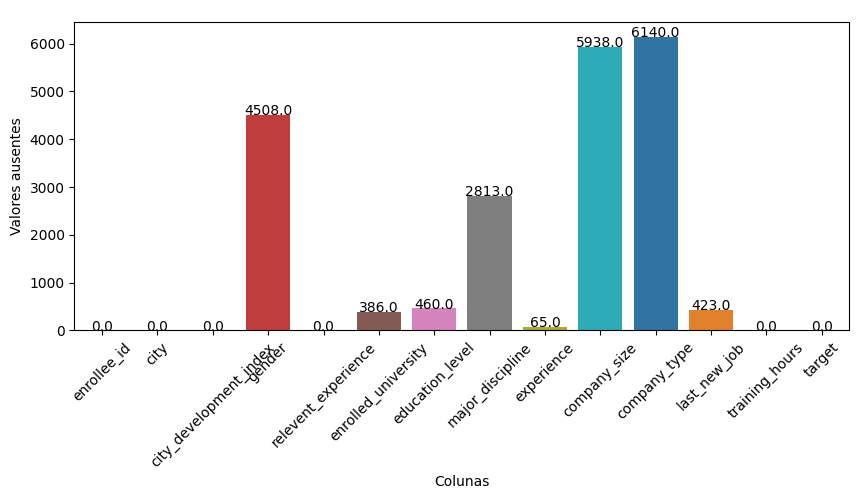

In [392]:
# Verificando os dados nulos por coluna
df_Nulos = df_Train.isna().sum().reset_index()

#Visualizando
figNulos = plt.figure(figsize=(10, 4))

ax = sns.barplot(data= df_Nulos, x= 'index', y= 0, palette='tab10')
plt.xlabel('Colunas')
plt.xticks(rotation= 45)
plt.ylabel('Valores ausentes')

for c in ax.patches:
    ax.annotate(f'\n{c.get_height()}', (c.get_x()+0.4, (c.get_height())), ha='center', color='black', size=10)


### Tratamento de dados ausentes

#### Gênero (gender)

In [393]:
print('Distribuição da coluna Gênero:\n')
for valor, quantidade in df_Train['gender'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Distribuição da coluna Gênero:

Valor: Male | Quantidade: 13221 | Percentual: 69.01%
Valor: nan | Quantidade: 4508 | Percentual: 23.53%
Valor: Female | Quantidade: 1238 | Percentual: 6.46%
Valor: Other | Quantidade: 191 | Percentual: 1.00%


In [394]:
# Como gênero não é uma coluna eliminatória, vamos alterar os dados vazios para Other
df_Train['gender'] = df_Train['gender'].fillna('Other')
df_Train['gender'].value_counts()

Male      13221
Other      4699
Female     1238
Name: gender, dtype: int64

#### Tipo de curso matriculado (enrolled_university)

In [395]:
for valor, quantidade in df_Train['enrolled_university'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: no_enrollment | Quantidade: 13817 | Percentual: 72.12%
Valor: Full time course | Quantidade: 3757 | Percentual: 19.61%
Valor: Part time course | Quantidade: 1198 | Percentual: 6.25%
Valor: nan | Quantidade: 386 | Percentual: 2.01%


In [396]:
# Sabendo que os dados nulos da coluna tem um percentual pequeno (< 3%), vamos distribuí-los igualmente entre as outras 3 variáveis

#Criando uma lista com os 3 valores repetidos
ValoresPreencher = ['no_enrollment', 'Full time course', 'Part time course']

#Localizando os índices dos valores nulos
IndicesNulosUniversidade = df_Train[df_Train['enrolled_university'].isna()].index

#Garantindo o mesmo tamanho da lista e nulos
valoresRepetidos = ValoresPreencher * (len(IndicesNulosUniversidade) // 3 + 1)
valoresRepetidos = valoresRepetidos[:len(IndicesNulosUniversidade)]

#Preenchendo proporcionalmente os valores nulos entre as três variáveis possíveis
df_Train.loc[IndicesNulosUniversidade, 'enrolled_university'] = valoresRepetidos

In [397]:
for valor, quantidade in df_Train['enrolled_university'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: no_enrollment | Quantidade: 13946 | Percentual: 72.79%
Valor: Full time course | Quantidade: 3886 | Percentual: 20.28%
Valor: Part time course | Quantidade: 1326 | Percentual: 6.92%


#### Nível educacional (education_level)


In [398]:
for valor, quantidade in df_Train['education_level'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: Graduate | Quantidade: 11598 | Percentual: 60.54%
Valor: Masters | Quantidade: 4361 | Percentual: 22.76%
Valor: High School | Quantidade: 2017 | Percentual: 10.53%
Valor: nan | Quantidade: 460 | Percentual: 2.40%
Valor: Phd | Quantidade: 414 | Percentual: 2.16%
Valor: Primary School | Quantidade: 308 | Percentual: 1.61%


In [399]:
# Como candidatos que estão na Primary School são desclassificados automaticamente, alteraremos os nulos como High School para não eliminarmos os candidatos e, durante o processo seletivo, o candidato terá que apresentar o certificado de conclusão de ensino (seja de Primary ou High School, Graduate, Masters ou PHD)

df_Train['education_level'] = df_Train['education_level'].fillna('High School')
df_Train['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2477
Phd                 414
Primary School      308
Name: education_level, dtype: int64

#### Área de estudo do candidato (major_discipline)


In [400]:
for valor, quantidade in df_Train['major_discipline'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: STEM | Quantidade: 14492 | Percentual: 75.64%
Valor: nan | Quantidade: 2813 | Percentual: 14.68%
Valor: Humanities | Quantidade: 669 | Percentual: 3.49%
Valor: Other | Quantidade: 381 | Percentual: 1.99%
Valor: Business Degree | Quantidade: 327 | Percentual: 1.71%
Valor: Arts | Quantidade: 253 | Percentual: 1.32%
Valor: No Major | Quantidade: 223 | Percentual: 1.16%


In [401]:
# Como temos 2.813 dados nulos na variável major_discipline e, 2.785 de Primary e High School na variável education_level, vamos alterar os dados nulos de major_discipline para "Non Degree", pois fica como se o candidato não possuisse um curso de gradução (o que condiz que o nível educacional dos candidatos que estão no primário ou ensino médio). Mas, há uma diferença de 28 candidatos que não estão no High School e Primary School, portanto, este remanescente iremos incluir como "Other"

#Calculando os dados nulos
nulosMajor = df_Train[df_Train['major_discipline'].isna()]

#Filtrando os índices de Primary e High School da coluna 'education_level' 
indiceSemGraduacao = nulosMajor[df_Train['education_level'].isin(['Primary School', 'High School'])].index

#Atribuindo "Non Degree" para esses índices
df_Train.loc[indiceSemGraduacao, 'major_discipline'] = "Non Degree"

#Atribuindo "Other" para os remanescentes
indiceNulosMajor = df_Train[df_Train['major_discipline'].isna()].index
df_Train.loc[indiceNulosMajor, 'major_discipline'] = "Other"

C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [402]:
for valor, quantidade in df_Train['major_discipline'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: STEM | Quantidade: 14492 | Percentual: 75.64%
Valor: Non Degree | Quantidade: 2785 | Percentual: 14.54%
Valor: Humanities | Quantidade: 669 | Percentual: 3.49%
Valor: Other | Quantidade: 409 | Percentual: 2.13%
Valor: Business Degree | Quantidade: 327 | Percentual: 1.71%
Valor: Arts | Quantidade: 253 | Percentual: 1.32%
Valor: No Major | Quantidade: 223 | Percentual: 1.16%


#### Experiência do candidato (experience)

In [403]:
for valor, quantidade in df_Train['experience'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: >20 | Quantidade: 3286 | Percentual: 17.15%
Valor: 5 | Quantidade: 1430 | Percentual: 7.46%
Valor: 4 | Quantidade: 1403 | Percentual: 7.32%
Valor: 3 | Quantidade: 1354 | Percentual: 7.07%
Valor: 6 | Quantidade: 1216 | Percentual: 6.35%
Valor: 2 | Quantidade: 1127 | Percentual: 5.88%
Valor: 7 | Quantidade: 1028 | Percentual: 5.37%
Valor: 10 | Quantidade: 985 | Percentual: 5.14%
Valor: 9 | Quantidade: 980 | Percentual: 5.12%
Valor: 8 | Quantidade: 802 | Percentual: 4.19%
Valor: 15 | Quantidade: 686 | Percentual: 3.58%
Valor: 11 | Quantidade: 664 | Percentual: 3.47%
Valor: 14 | Quantidade: 586 | Percentual: 3.06%
Valor: 1 | Quantidade: 549 | Percentual: 2.87%
Valor: <1 | Quantidade: 522 | Percentual: 2.72%
Valor: 16 | Quantidade: 508 | Percentual: 2.65%
Valor: 12 | Quantidade: 494 | Percentual: 2.58%
Valor: 13 | Quantidade: 399 | Percentual: 2.08%
Valor: 17 | Quantidade: 342 | Percentual: 1.79%
Valor: 19 | Quantidade: 304 | Percentual: 1.59%
Valor: 18 | Quantidade: 280 | Percentual

In [404]:
# Como os dados nulos de experiência são valores mínimos (< 1%), vamos retirar os valores de nossa análise
df_Train = df_Train.dropna(subset=['experience'])


In [405]:
for valor, quantidade in df_Train['experience'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: >20 | Quantidade: 3286 | Percentual: 17.21%
Valor: 5 | Quantidade: 1430 | Percentual: 7.49%
Valor: 4 | Quantidade: 1403 | Percentual: 7.35%
Valor: 3 | Quantidade: 1354 | Percentual: 7.09%
Valor: 6 | Quantidade: 1216 | Percentual: 6.37%
Valor: 2 | Quantidade: 1127 | Percentual: 5.90%
Valor: 7 | Quantidade: 1028 | Percentual: 5.38%
Valor: 10 | Quantidade: 985 | Percentual: 5.16%
Valor: 9 | Quantidade: 980 | Percentual: 5.13%
Valor: 8 | Quantidade: 802 | Percentual: 4.20%
Valor: 15 | Quantidade: 686 | Percentual: 3.59%
Valor: 11 | Quantidade: 664 | Percentual: 3.48%
Valor: 14 | Quantidade: 586 | Percentual: 3.07%
Valor: 1 | Quantidade: 549 | Percentual: 2.88%
Valor: <1 | Quantidade: 522 | Percentual: 2.73%
Valor: 16 | Quantidade: 508 | Percentual: 2.66%
Valor: 12 | Quantidade: 494 | Percentual: 2.59%
Valor: 13 | Quantidade: 399 | Percentual: 2.09%
Valor: 17 | Quantidade: 342 | Percentual: 1.79%
Valor: 19 | Quantidade: 304 | Percentual: 1.59%
Valor: 18 | Quantidade: 280 | Percentual

#### Tamanho da última empresa (company_size)

In [406]:
for valor, quantidade in df_Train['company_size'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: nan | Quantidade: 5915 | Percentual: 30.98%
Valor: 50-99 | Quantidade: 3078 | Percentual: 16.12%
Valor: 100-500 | Quantidade: 2563 | Percentual: 13.42%
Valor: 10000+ | Quantidade: 2011 | Percentual: 10.53%
Valor: 10/49 | Quantidade: 1466 | Percentual: 7.68%
Valor: 1000-4999 | Quantidade: 1323 | Percentual: 6.93%
Valor: <10 | Quantidade: 1304 | Percentual: 6.83%
Valor: 500-999 | Quantidade: 874 | Percentual: 4.58%
Valor: 5000-9999 | Quantidade: 559 | Percentual: 2.93%


In [407]:
# Como o tamanho da última empresa não é uma variável eliminatória para nosso RH e, não são todos os candidatos que sabem corretamente o tamanho da empresa e quantos funcionários têm, vamos excluir a coluna.
df_Train = df_Train.drop(columns='company_size')
df_Train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,NaN,never,83,0.0
3,33241,city_115,0.789,Other,No relevent experience,no_enrollment,Graduate,Business Degree,<1,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,4,8,0.0


#### Tipo de empresa (company_type)

In [408]:
for valor, quantidade in df_Train['company_type'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: Pvt Ltd | Quantidade: 9796 | Percentual: 51.31%
Valor: nan | Quantidade: 6104 | Percentual: 31.97%
Valor: Funded Startup | Quantidade: 999 | Percentual: 5.23%
Valor: Public Sector | Quantidade: 953 | Percentual: 4.99%
Valor: Early Stage Startup | Quantidade: 601 | Percentual: 3.15%
Valor: NGO | Quantidade: 519 | Percentual: 2.72%
Valor: Other | Quantidade: 121 | Percentual: 0.63%


In [409]:
# No tipo de empresa, como já é uma variável mais importante para destacar o tipo de trabalho/experiência do candidato, vamos abordar de maneira parecida com o nível educacional, portanto, vamos alterar os dados nulos para Other e o candidato poderá informar/destacar a última empresa durante o processo seletivo.

df_Train['company_type'] = df_Train['company_type'].fillna('Other')
df_Train['company_type'].value_counts()

Pvt Ltd                9796
Other                  6225
Funded Startup          999
Public Sector           953
Early Stage Startup     601
NGO                     519
Name: company_type, dtype: int64

#### Último emprego (last_new_job)

In [410]:
for valor, quantidade in df_Train['last_new_job'].value_counts(dropna=False).items():
    percentual = (quantidade / len(df_Train)) * 100
    print(f'Valor: {valor} | Quantidade: {quantidade} | Percentual: {percentual:.2f}%')

Valor: 1 | Quantidade: 8019 | Percentual: 42.00%
Valor: >4 | Quantidade: 3283 | Percentual: 17.19%
Valor: 2 | Quantidade: 2897 | Percentual: 15.17%
Valor: never | Quantidade: 2444 | Percentual: 12.80%
Valor: 4 | Quantidade: 1028 | Percentual: 5.38%
Valor: 3 | Quantidade: 1023 | Percentual: 5.36%
Valor: nan | Quantidade: 399 | Percentual: 2.09%


In [411]:
# O último emprego é uma variável importante, mas não a ponto de termos que alterar toda sua estrutura devido aos dados nulos. Os candidatos que não preencheram essa parte do formulário, vamos considerar como pessoas que nunca trabalharam e alterar de NaN p/ Never
df_Train['last_new_job'] = df_Train['last_new_job'].fillna('never')
df_Train['last_new_job'].value_counts()

1        8019
>4       3283
2        2897
never    2843
4        1028
3        1023
Name: last_new_job, dtype: int64

#### Conferindo se todos os dados foram tratados

In [412]:
df_Train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

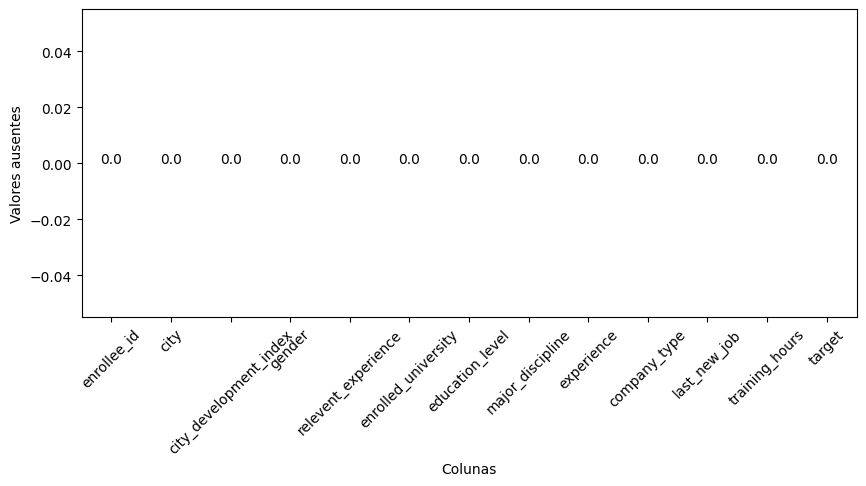

In [413]:
# Verificando os dados nulos por coluna
df_Nulos = df_Train.isna().sum().reset_index()

#Visualizando
figNulos = plt.figure(figsize=(10, 4))

ax = sns.barplot(data= df_Nulos, x= 'index', y= 0, palette='tab10')
plt.xlabel('Colunas')
plt.xticks(rotation= 45)
plt.ylabel('Valores ausentes')

for c in ax.patches:
    ax.annotate(f'\n{c.get_height()}', (c.get_x()+0.4, (c.get_height())), ha='center', color='black', size=10)

In [417]:
df_Train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Other,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,Other,never,83,0.0
3,33241,city_115,0.789,Other,No relevent experience,no_enrollment,Graduate,Business Degree,<1,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,4,8,0.0


### Análise Exploratória

#### Distribuição de valores nas colunas

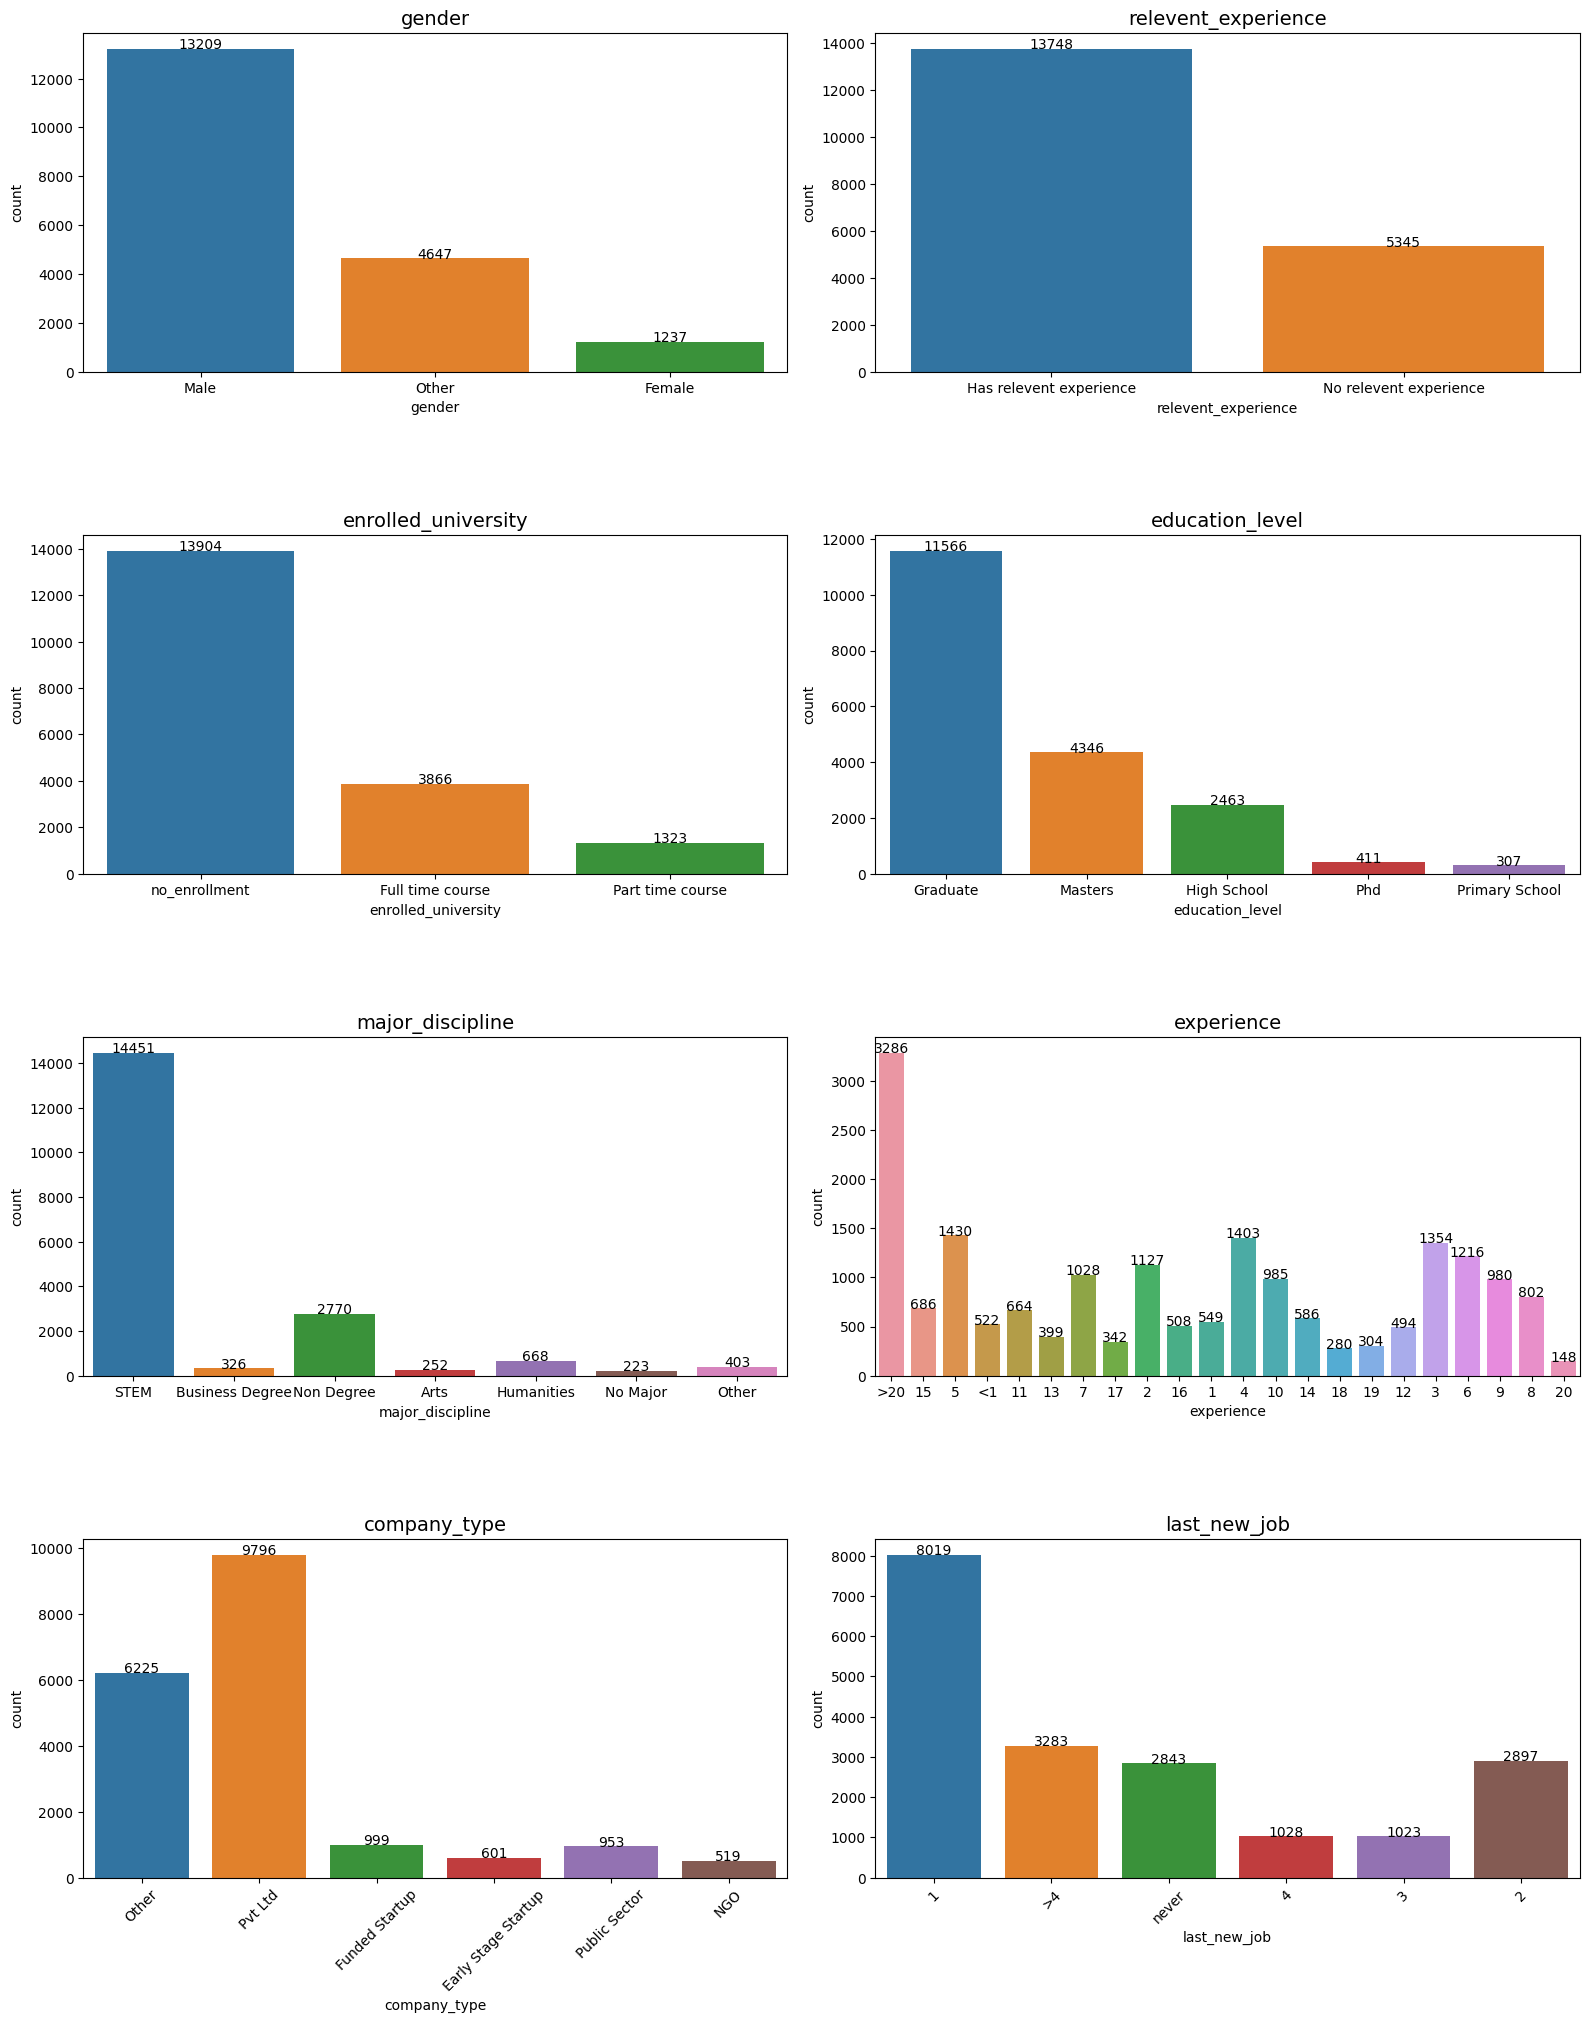

In [428]:
plt.figure(figsize= (16, 24))

lista_colunas = list(df_Train.columns.values)[3:11]

for A, i in enumerate(lista_colunas, start=1):
    plt.subplot(5, 2, A)
    ax = sns.countplot(data=df_Train, x=i)
    plt.title(i, fontsize=14)
    for p in ax.patches:
        ax.annotate(f'\n{int(p.get_height())}', (p.get_x() + 0.4, p.get_height()), ha='center', color='black')
    if A >= 7:
        plt.xticks(rotation=45)

plt.tight_layout(h_pad=2)
plt.show()

Tratamento e ferramentas utilizadas

Visualização de gráficos e ferramentas

Transposição das informações p/ power BI

Finalização